# Working with Time Series Data

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from vega_datasets import data

## 1. Call the sf_temps() dataset from the vega_datasets library like so:


## Use the above dataset for the following exercises:

In [22]:
sf_temps_df = data.sf_temps()

### a. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [23]:
# taking a look at the data
sf_temps_df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [24]:
# checking the dtypes
sf_temps_df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [25]:
# set the index for df as the dat
sf_temps_df = sf_temps_df.set_index('date')

In [26]:
#check the df
sf_temps_df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


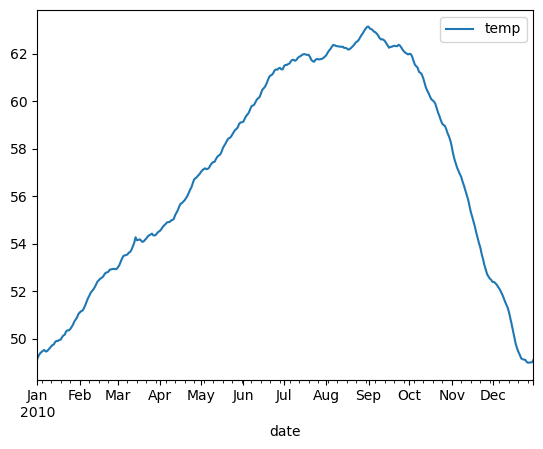

In [34]:
sf_temps_df.resample('D').mean().plot(label='Daily Average');

### b. Write the code necessary to visualize the minimum temperature over time.

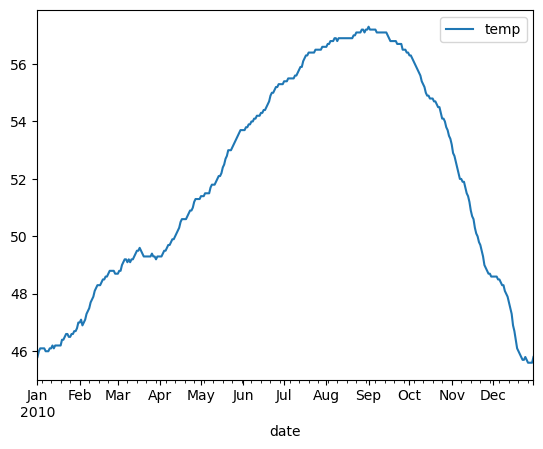

In [35]:
sf_temps_df.resample('D').min().plot();

### c. Write the code necessary to visualize the maximum temperature over time.

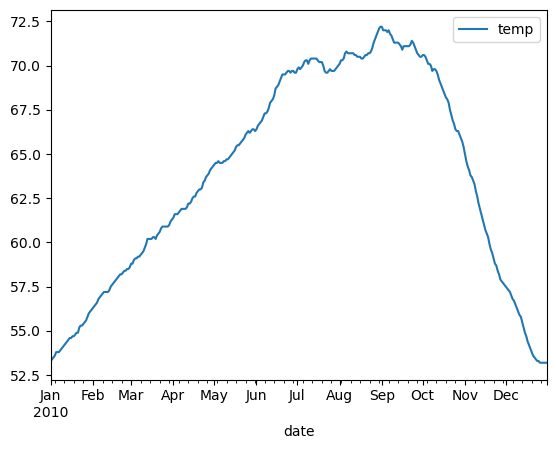

In [37]:
sf_temps_df.resample('D').max().plot();

### d. Which month is the coldest, on average?

In [57]:
sf_temps_df['avg_monthly_temp'] = sf_temps_df.resample('M').mean()

In [59]:
sf_temps_df[sf_temps_df.avg_monthly_temp == sf_temps_df.avg_monthly_temp.min()]

,temp,avg_monthly_temp
date,,
2010-01-31,49.4,49.98414


### e. Which month has the highest average temperature?

In [60]:
sf_temps_df[sf_temps_df.avg_monthly_temp == sf_temps_df.avg_monthly_temp.max()]

,temp,avg_monthly_temp
date,,
2010-09-30,58.1,62.487083


### f. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [67]:
sf_daily_min_max = sf_temps_df.resample('D').agg(min_temp = ('temp', 'min'),max_temp = ('temp', 'max')).reset_index()
sf_daily_min_max

,date,min_temp,max_temp
0,2010-01-01,45.8,53.3
1,2010-01-02,46.0,53.4
2,2010-01-03,46.1,53.5
3,2010-01-04,46.1,53.6
4,2010-01-05,46.1,53.8
...,...,...,...
360,2010-12-27,45.6,53.2
361,2010-12-28,45.6,53.2
362,2010-12-29,45.6,53.2
363,2010-12-30,45.6,53.2


In [64]:
#sf_daily_min_max = sf_daily_min_max.drop(columns = 'avg_monthly_temp')

In [70]:
sf_daily_min_max['daily_temp_diff'] = sf_daily_min_max.max_temp - sf_daily_min_max.min_temp

In [77]:
sf_daily_min_max = sf_daily_min_max.set_index('date')

In [85]:
sf_daily_min_max[sf_daily_min_max.daily_temp_diff == sf_daily_min_max.daily_temp_diff.max()]

,min_temp,max_temp,daily_temp_diff
date,,,
2010-08-31,57.2,72.2,15.0


## 2. Use the above dataset for the following exercises:

In [131]:
seattle_df = data.seattle_weather()

In [132]:
seattle_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [133]:
seattle_df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [134]:
seattle_df = seattle_df.set_index('date')

### a. year and month combination has the highest amount of precipitation?

In [221]:
seattle_df[seattle_df.precipitation == seattle_df.precipitation.max()]

,precipitation,temp_max,temp_min,wind,weather,sunny_days,rainy_days,some_prec
date,,,,,,,,
2015-03-15,55.9,10.6,6.1,4.2,fog,0,0,1


### b. Visualize the amount of monthly precipitation over time.

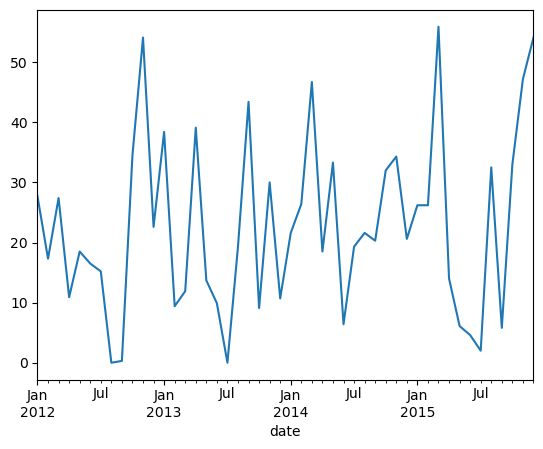

In [136]:
seattle_df.resample('M').precipitation.max().plot();

### c. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

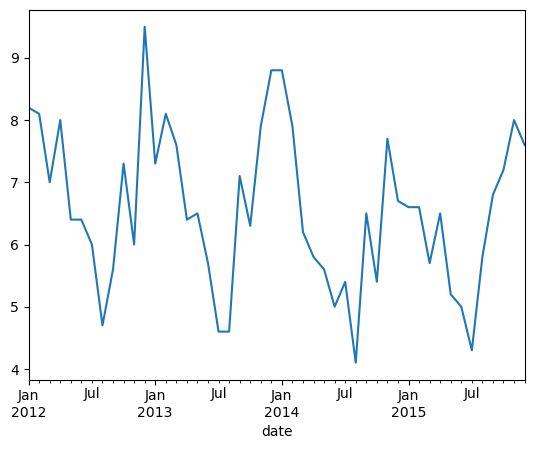

In [137]:
seattle_df.resample('M').wind.max().plot();

### d. Which year-month combination is the windiest?

In [138]:
seattle_df[seattle_df.wind == seattle_df.wind.max()]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-17,2.0,8.3,1.7,9.5,rain


### e. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [139]:
seattle_df['sunny_days'] = seattle_df.weather == 'sun'

In [140]:
seattle_df['sunny_days'] = seattle_df.sunny_days.replace({False:0, True:1})

In [164]:
seattle_df.resample('Y').sunny_days.sum().sort_values(ascending=False).head(1)

date
2014-12-31    211
Name: sunny_days, dtype: int64

### f. In which month does it rain the most?

In [150]:
seattle_df['rainy_days'] = seattle_df.weather == 'rain'

In [151]:
seattle_df['rainy_days'] = seattle_df.rainy_days.replace({False:0, True:1})

In [160]:
seattle_df.resample('M').rainy_days.sum().sort_values(ascending=False).head(1)

date
2012-11-30    25
Name: rainy_days, dtype: int64

### g. Which month has the most number of days with a non-zero amount of precipitation?

In [168]:
seattle_df['some_prec'] = seattle_df.precipitation != 0.0

In [169]:
seattle_df['some_prec'] = seattle_df.some_prec.replace({False:0, True:1})

In [170]:
seattle_df.resample('M').some_prec.sum().sort_values(ascending=False).head(1)

date
2012-12-31    27
Name: some_prec, dtype: int64

## 3. Use the above dataset for the following exercises:

In [177]:
flight_df = data.flights_20k()

In [178]:
flight_df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [179]:
flight_df.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

### a. Convert any negative delays to 0.

In [180]:
flight_df['delay'] = np.where(flight_df.delay > 0, flight_df.delay, 0)

In [182]:
flight_df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND


In [198]:
flight_df = flight_df.set_index('date')

### b. Which hour of the day has the highest average delay?

In [188]:
flight_df.resample('1H').delay.mean().sort_values(ascending=False).head(1)

date
2001-02-23 03:00:00    360.0
Name: delay, dtype: float64

In [189]:
flight_df.resample('1H').delay.mean().max()

360.0

### c. Does the day of the week make a difference in the delay amount?

In [200]:
flight_df['day_of_week'] = flight_df.index.day_name()

In [217]:
flight_df.groupby('day_of_week').delay.mean().sort_values(ascending=False)

day_of_week
Friday       17.757596
Thursday     12.821322
Wednesday    11.032478
Sunday       10.413542
Tuesday       9.410866
Saturday      8.431498
Monday        7.165772
Name: delay, dtype: float64

### d. Does the month make a difference in the delay amount?

In [213]:
flight_df['month'] = flight_df.index.month

In [218]:
flight_df.groupby('month').delay.mean().sort_values(ascending=False)

month
2    12.306106
1    11.301592
3     9.875287
Name: delay, dtype: float64